In [42]:
import re
import nltk
import string
import pandas as pd
import seaborn as sns   
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

LOADING TRAINING DATA

In [43]:
train_path = "train_data.txt"
train_data = pd.read_csv(train_path, sep = ':::', names = ['Title', 'Genre', 'Description'], engine = 'python')

In [3]:
train_data.head()

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [5]:
train_data.columns

Index(['Title', 'Genre', 'Description'], dtype='object')

In [6]:
train_data.isnull().sum()

Title          0
Genre          0
Description    0
dtype: int64

In [7]:
train_data.duplicated().sum()

0

In [44]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [45]:
train_data.describe()

,Title,Genre,Description
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


LOADING TEST DATA

In [46]:
test_path = "test_data.txt"
test_data = pd.read_csv(test_path, sep = ":::", names = ['Id', 'Title', 'Description'], engine = 'python')

In [11]:
test_data.head()

,Id,Title,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [12]:
test_data.columns

Index(['Id', 'Title', 'Description'], dtype='object')

In [47]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           54200 non-null  int64 
 1   Title        54200 non-null  object
 2   Description  54200 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [48]:
test_data.describe()

,Id
count,54200.000000
mean,27100.500000
std,15646.336632
min,1.000000
25%,13550.750000
50%,27100.500000
75%,40650.250000
max,54200.000000


LOADING TEST DATA SOLUTIONS

In [49]:
test_solution_path = "test_data_solution.txt"
test_solution_data = pd.read_csv(test_solution_path, sep = ':::', names = ['Id', 'Title', 'Genre', 'Description'], engine = 'python')

In [50]:
test_solution_data.head()

,Id,Title,Genre,Description
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [51]:
test_solution_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           54200 non-null  int64 
 1   Title        54200 non-null  object
 2   Genre        54200 non-null  object
 3   Description  54200 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [52]:
test_solution_data.describe()

,Id
count,54200.000000
mean,27100.500000
std,15646.336632
min,1.000000
25%,13550.750000
50%,27100.500000
75%,40650.250000
max,54200.000000


In [19]:
test_solution_data.isnull().sum()

Id             0
Title          0
Genre          0
Description    0
dtype: int64

GENRE DISTRIBUTION

In [53]:
genre_type = train_data['Genre'].value_counts()
print(len(genre_type))

27


In [54]:
genre_count = genre_type.sort_values(ascending = False)

C:\Users\Kruti Upasani\AppData\Local\Temp\ipykernel_1280\2847605838.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = genre_count.index, y = genre_count.values, palette = "viridis")


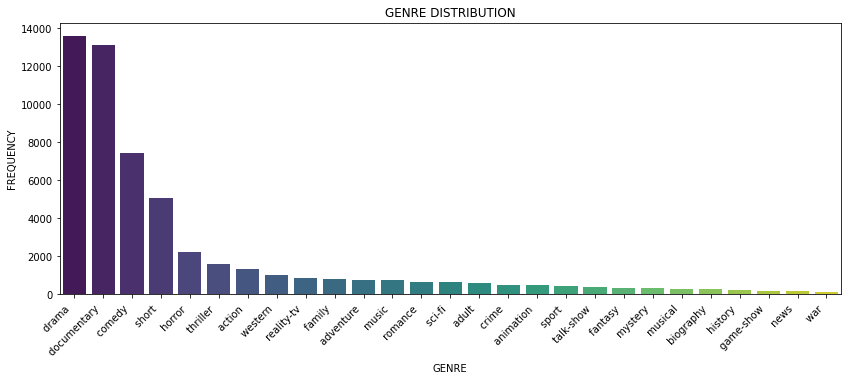

In [55]:
plt.figure(figsize=(14,5))
sns.barplot(x = genre_count.index, y = genre_count.values, palette = "viridis")
plt.title("GENRE DISTRIBUTION")
plt.xlabel("GENRE")
plt.ylabel("FREQUENCY")
plt.xticks(rotation = 45, ha = 'right')
plt.show()

CLEAN DESCRIPTION

In [23]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer

In [24]:
stemmer = LancasterStemmer()

In [25]:
stop_words = set(stopwords.words("english"))

In [26]:
def clean_data(text):
    text = text.lower()
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'.pic\S+', '', text)
    text = re.sub(r'[^a-zA-Z+]', ' ', text)
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    text = " ".join([i for i in words if i not in stop_words and len(i) > 2])
    text = re.sub(r"\s+", " ", text).strip()
    return text

In [27]:
train_data['clean_description'] = train_data['Description'].apply(clean_data)

In [28]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')   

[nltk_data] Downloading package stopwords to C:\Users\Kruti
[nltk_data]     Upasani\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Kruti
[nltk_data]     Upasani\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [29]:
test_data['clean_description'] = test_data['Description'].apply(clean_data)
test_solution_data['clean_description'] = test_solution_data['Description'].apply(clean_data)

In [30]:
train_data.head()

,Title,Genre,Description,clean_description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listening conversation doctor parents year old...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empties students field trip museum natural...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,film title refers recovered bodies ground zero...


In [31]:
test_data.head()

,Id,Title,Description,clean_description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",brane loves life car apartment job especially ...
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",spain march quico naughty child three belongin...
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,one year life albin family shepherds north tra...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",father died spoken brother years serious cance...
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,known internationally martial arts superstar b...


In [32]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_data['Genre']) 
#takes genre column from train data and assigns numerical label to the categorical values - eg: action(1), comedy(2) thriller(3) etc

In [33]:
print(y_train)

[ 8 24  1 ...  7  8 16]


FORM THE PIPELINE FOR SVC

In [34]:
pipeline = Pipeline([
    ("tfidf", TfidfVectorizer(max_df = 0.9, ngram_range = (1,2,))),
    ("model", SVC(kernel = 'linear', C=1))
])

In [35]:
X_train, X_test, y_train, y_test = train_test_split(train_data['clean_description'], y_train, test_size = 0.2, random_state = 42)

In [36]:
# pipeline.fit(X_train, y_train)
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(max_df=0.9, ngram_range=(1, 2))),
                ('model', SVC(C=1, kernel='linear'))])

In [37]:
y_train_pred = pipeline.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training accuracy: {train_accuracy}")

Training accuracy: 0.9853125


In [38]:
y_test_pred = pipeline.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Validation Accuracy: {test_accuracy}")

Validation Accuracy: 0.495


In [39]:
test_descriptions = test_data['clean_description']
test_predictions = pipeline.predict(test_descriptions)
test_predictions_labels = label_encoder.inverse_transform(test_predictions)

In [41]:
test_data['Predicted_Genre'] = test_predictions_labels

test_solution = test_solution_data[['Id', 'Genre']]
test_data = test_data[['Id', 'Predicted_Genre']]
comparision_df = test_data.merge(test_solution, on='Id')
comparision_df.columns = ['Id', 'Predicted_Genre', 'Actual_Genre']

accuracy = accuracy_score(comparision_df['Actual_Genre'], comparision_df['Predicted_Genre'])
print(f"Test Data Accuracy: {accuracy}")

Test Data Accuracy: 0.472
